In [10]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps
from sklearn.model_selection import KFold

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [11]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearchCV import HybridCombinationSearchCV
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from KNN.SpecialItemKNNCBFRecommender import SpecialItemKNNCBFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from SLIM_ElasticNet.SSLIM_ElasticNet import SSLIMElasticNet
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender
from KNN.ItemKNN_CBF_CF import ItemKNN_CBF_CF

In [12]:
seed = 1666
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

#URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.85, seed=seed)

In [13]:
rp3b = (RP3betaRecommender, {'topK': 926, 'alpha': 0.4300109351916609, 'beta': 0.01807360750913967, 'normalize_similarity': False})
p3a = (P3alphaRecommender, {'topK': 575, 'alpha': 0.48009885897470206, 'normalize_similarity': False})
icf = (ItemKNNCFRecommender, {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'TF-IDF'})
ucf = (UserKNNCFRecommender, {'topK': 163, 'shrink': 846, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'TF-IDF'})
icb = (ItemKNNCBFRecommender, {'topK': 164, 'shrink': 8, 'similarity': 'jaccard', 'normalize': True})
sbpr = (SLIM_BPR_Cython, {'topK': 1000, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 1e-05, 'lambda_j': 1e-05, 'learning_rate': 0.0001})
icfcb = (ItemKNN_CBF_CF, {'topK': 1000, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.241892724784089, 'feature_weighting': 'TF-IDF', 'icm_weight': 1.0})
sslim = (SSLIMElasticNet, {'beta': 0.567288665094892, 'topK': 1000, 'l1_ratio': 1e-05, 'alpha': 0.001})
psvd = (PureSVDRecommender, {'num_factors': 350})
icbsup = (SpecialItemKNNCBFRecommender, {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': True, 'feature_weighting': 'BM25'})

In [27]:
combo_labels ={
    'combo1': 'icb, icf, p3a',
    'combo2': 'cb, icf, rp3b',
    'combo3': 'cb, rp3b, p3a',
    'combo4': 'icb, ucf, p3a', 
    'combo5': 'icb, ucf, rp3b',
    'combo6': 'icb, icfcb, icf',
    'combo7': 'icb, icfcb, p3a',
    'combo8': 'icb, icfcb, rp3b',
    'combo9': 'icb, icfcb, ucf',
    'combo10': 'icb, icfcb, sbpr',
    'combo11': 'icbsup, icfcb, icf',
    'combo12': 'icbsup, icfcb, p3a',
    'combo13': 'icbsup, icfcb, rp3b',
    'combo14': 'icbsup, icfcb, ucf',
    'combo15': 'icbsup, icfcb, sbpr',
    'combo16': 'icbsup, icf, p3a',
    'combo17': 'icbsup, icfcb, rp3b',
    'combo18': 'icbsup, icf, ucf',
    'combo19': 'icbsup, icf, sbpr',
    'combo20': 'icbsup, p3a, rp3b',
    'combo21': 'icbsuo, ucf, p3a',
    'combo22': 'icbsup, ucf, rp3b',
    'combo23': 'icbsup, ucf, sbpr',
    'combo24': 'icbsup, sbpr, sslim',
    'combo25': 'icbsup, p3a, sslim',
    'combo26': 'icbsup, ucf, sslim',
    'combo27': 'icbsup, icf, sslim',
    'combo28': 'icbsup, icfcb, sslim',
    'combo29': 'icbsup, rp3b, sslim',
    'combo30': 'icb, sbpr, sslim',
    'combo31': 'icb, rp3b, sslim',
    'combo32': 'icb, p3a, sslim',
    'combo33': 'rp3b',
    'combo34': 'p3a',
    'combo35': 'icf',
    'combo36': 'ucf',
    'combo37': 'icb',
    'combo38': 'sbpr',
    'combo39': 'icfcb',
    'combo40': 'sslim',
    'combo41': 'psvd',
    'combo42': 'icbsup',
}

In [15]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=seed)

URM_list = []
URM_test_list = []
evaluator_list = []

shape = URM_all.shape
indptr = URM_all.indptr
indices = URM_all.indices
data = URM_all.data

for train_index, test_index in kf.split(data):
    data_train = np.ones(data.shape)
    data_test = np.ones(data.shape)
    data_train[test_index] = 0
    data_test[train_index] = 0
    kf_train = sps.csr_matrix((data_train, indices, indptr), shape=shape).copy()
    kf_test = sps.csr_matrix((data_test, indices, indptr), shape=shape).copy()
    kf_train.eliminate_zeros()
    kf_test.eliminate_zeros()
    URM_list.append(kf_train)
    URM_test_list.append(kf_test)
    evaluator_list.append(EvaluatorHoldout(kf_test, cutoff_list=[10]))

In [16]:
list_rec = [([icb, icf, p3a], {'alpha': 0.44569420382449637, 'l1_ratio': 0.6168742754254437}),
            ([icb, icf, rp3b], {'alpha': 0.3033751201293658, 'l1_ratio': 0.7822655054333012}),
            ([icb, icf, ucf], {'alpha': 0.48973465405541533, 'l1_ratio': 0.3567553681370489}),
            ([icb, rp3b, p3a], {'alpha': 0.6171935935379741, 'l1_ratio': 0.4090970817953153}),
            ([icb, ucf, p3a], {'alpha': 0.6310254748569911, 'l1_ratio': 0.42318219644561506}),
            ([icb, ucf, rp3b], {'alpha': 0.5388201552532741, 'l1_ratio': 0.35597718538152645}),
            ([icb, icfcb, icf], {'alpha': 0.9457062373092435, 'l1_ratio': 0.08675668683308081}),
            ([icb, icfcb, p3a], {'alpha': 0.6904008032335807, 'l1_ratio': 0.23371348584724985}),
            ([icb, icfcb, rp3b], {'alpha': 0.8129428861277737, 'l1_ratio': 0.14069122456123387}),
            ([icb, icfcb, ucf], {'alpha': 0.8129428861277737, 'l1_ratio': 0.14069122456123387}),
            ([icb, icfcb, sbpr], {'alpha': 0.8991751672246813, 'l1_ratio': 0.11874637825106651}),
            ([icbsup, icfcb, icf], {'alpha': 0.8122492419947548, 'l1_ratio': 0.1448868067763832}),
            ([icbsup, icfcb, p3a], {'alpha': 0.6094679138906033, 'l1_ratio': 0.41715098578193194}),
            ([icbsup, icfcb, rp3b], {'alpha': 0.5369911284211629, 'l1_ratio': 0.45078644454282}),
            ([icbsup, icfcb, ucf], {'alpha': 0.7020854096807992, 'l1_ratio': 0.20749665943340362}),
            ([icbsup, icfcb, sbpr], {'alpha': 0.7949204415356104, 'l1_ratio': 0.2705694962114903}),
            ([icbsup, icf, p3a], {'alpha': 0.4973334775913678, 'l1_ratio': 0.6790274919219236}),
            ([icbsup, icfcb, rp3b], {'alpha': 0.45931982254221104, 'l1_ratio': 0.552400663560699}),
            ([icbsup, icf, ucf], {'alpha': 0.5934342246244017, 'l1_ratio': 0.38793882442583466}),
            ([icbsup, icf, sbpr], {'alpha': 0.8170119826252383, 'l1_ratio': 0.33586027250410305}),
            ([icbsup, p3a, rp3b], {'alpha': 0.4001101186128191, 'l1_ratio': 0.9989082076640393}),
            ([icbsuo, ucf, p3a], {'alpha': 0.627349023025726, 'l1_ratio': 0.5343474311262314}),
            ([icbsup, ucf, rp3b], {'alpha': 0.5574853559798421, 'l1_ratio': 0.5221328226891215}),
            ([icbsup, ucf, sbpr], {'alpha': 0.9033873534648698, 'l1_ratio': 0.30678626017844307}),
            ([icbsup, sbpr, sslim], {'alpha': 0.6194113348305054, 'l1_ratio': 0.6156379091138154}),
            ([icbsup, p3a, sslim], {'alpha': 0.7989350513339316, 'l1_ratio': 0.4461703935735907}),
            ([icbsup, ucf, sslim], {'alpha': 0.7362031685050584, 'l1_ratio': 0.3394266517525301}),
            ([icbsup, icf, sslim], {'alpha': 0.6383024036201149, 'l1_ratio': 0.5132363657816151}),
            ([icbsup, icfcb, sslim], {'alpha': 0.8162670192627814, 'l1_ratio': 0.26730373918567046}),
            ([icbsup, rp3b, sslim], {'alpha': 0.7881737847053779, 'l1_ratio': 0.400772981812612}),
            ([icb, sbpr, sslim], {'alpha': 0.5238332406148302, 'l1_ratio': 0.5907932058981844}),
            ([icb, rp3b, sslim], {'alpha': 0.7861575718386372, 'l1_ratio': 0.34264216397962627}),
            ([icb, p3a, sslim], {'alpha': 0.6325200648079097, 'l1_ratio': 0.4685932097360991}),
            rp3b,
            p3a,
            icf,
            ucf,
            icb,
            sbpr,
            icfcb,
            sslim,
            psvd,
            icbsup,
]

In [17]:
num_combo = len(list_rec)

In [18]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            if not isinstance(list_rec[k][0], list):
                rec = list_rec[k][0]
                try:
                    rec = rec(URM_train, ICM_train, verbose = False)
                except:
                    rec = rec(URM_train, verbose=False)
                try:
                    rec.load_model(f'stored_recommenders/seed_{str(self.seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(self.seed)}_fold-{str(self.fold)}')
                    print(f"{rec.RECOMMENDER_NAME} loaded. [seed={self.seed}, fold={self.fold}]")
                except:
                    print(f"Fitting {rec.RECOMMENDER_NAME} ... [seed={self.seed}, fold={self.fold}]")
                    rec.fit(**rec_keywargs)
                    print(f"done.")
                    rec.save_model(f'stored_recommenders/seed_{str(self.seed)}_hybrid_search/{rec.RECOMMENDER_NAME}/', f'{str(self.seed)}_fold-{str(self.fold)}')
            else:
                rec = HybridCombinationSearchCV(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
                rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.60 sec. Users per second: 669
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNC

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_16

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.66 sec. Users per second: 638
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %)

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.90 sec. Users per second: 603
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
Us

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.70 sec. Users per second: 667
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.8

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.64 sec. Users per second: 664
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-4'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNC

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.71 sec. Users per second: 668
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
SLIM

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.57 sec. Users per second: 683
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecom

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recomm

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.67 sec. Users per second: 636
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.72 sec. Users per second: 664
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNC

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.66 sec. Users per second: 656
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold us

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1059 ( 100.00% ) in 1.68 sec. Users per second: 630
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecomme

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-1'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_16

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1132 ( 100.00% ) in 1.70 sec. Users per second: 668
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Ite

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.68 sec. Users per second: 649
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRec

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1144 ( 100.00% ) in 1.86 sec. Users per second: 617
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1069 ( 100.00% ) in 1.67 sec. Users per second: 638
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3

ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1091 ( 100.00% ) in 1.65 sec. Users per second: 662
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detect

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.60 sec. Users per second: 639
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
It

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.61 sec. Users per second: 629
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3a

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.63 sec. Users per second: 629
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNC

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-1'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.53 sec. Users per second: 653
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.65 sec. Users per second: 617
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.80 sec. Users per second: 546
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: U

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.64 sec. Users per second: 620
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: 

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.57 sec. Users per second: 646
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold ite

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.61 sec. Users per second: 636
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommend

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.12 sec. Users per second: 892
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender:

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1026 ( 100.00% ) in 1.58 sec. Users per second: 650
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.44 sec. Users per second: 682
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fol

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 999 ( 100.00% ) in 1.57 sec. Users per second: 636
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Item

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.59 sec. Users per second: 639
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRec

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 984 ( 100.00% ) in 1.50 sec. Users per second: 658
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_t

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.55 sec. Users per second: 655
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1016 ( 100.00% ) in 1.59 sec. Users per second: 640
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.38 sec. Users per second: 640
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
It

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.40 sec. Users per second: 639
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3a

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.24 sec. Users per second: 681
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNC

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-1'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.83 sec. Users per second: 551
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.8

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.68 sec. Users per second: 580
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-1'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.49 sec. Users per second: 616
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold 

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.76 sec. Users per second: 565
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_R

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.57 sec. Users per second: 601
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 24

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 1.80 sec. Users per second: 851
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommend

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.55 sec. Users per second: 612
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1522 ( 100.00% ) in 2.65 sec. Users per second: 574
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN

EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.56 sec. Users per second: 604
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fo

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1556 ( 100.00% ) in 2.60 sec. Users per second: 598
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Ite

EvaluatorHoldout: Processed 1557 ( 100.00% ) in 2.46 sec. Users per second: 633
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
SLIM_B

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1544 ( 100.00% ) in 2.44 sec. Users per second: 633
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1531 ( 100.00% ) in 2.69 sec. Users per second: 569
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CB

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.37 sec. Users per second: 588
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCB

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.24 sec. Users per second: 631
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecomme

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.34 sec. Users per second: 602
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCB

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.30 sec. Users per second: 602
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.58 sec. Users per second: 512
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/16

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_re

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.41 sec. Users per second: 574
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold u

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.54 sec. Users per second: 510
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Re

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.48 sec. Users per second: 553
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-

EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.32 sec. Users per second: 615
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommende

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 810 ( 100.00% ) in 1.48 sec. Users per second: 549
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCF

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.26 sec. Users per second: 636
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemK

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 812 ( 100.00% ) in 1.47 sec. Users per second: 554
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Item

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.42 sec. Users per second: 554
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaReco

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 804 ( 100.00% ) in 1.30 sec. Users per second: 616
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemK

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 820 ( 100.00% ) in 1.55 sec. Users per second: 528
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-1'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 785 ( 100.00% ) in 1.52 sec. Users per second: 515
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNC

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 1.09 sec. Users per second: 524
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
Ite

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.05 sec. Users per second: 565
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemK

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3a

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 569 ( 100.00% ) in 0.99 sec. Users per second: 573
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 0.97 sec. Users per second: 599
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
Use

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.13 sec. Users per second: 505
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.34 sec. Users per second: 447
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/16

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_re

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.25 sec. Users per second: 474
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Det

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.34 sec. Users per second: 427
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Re

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 1.25 sec. Users per second: 464
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.27 sec. Users per second: 466
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
R

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-1'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.26 sec. Users per second: 474
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCF

EvaluatorHoldout: Processed 569 ( 100.00% ) in 1.24 sec. Users per second: 457
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [se

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-4'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.27 sec. Users per second: 465
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM D

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 572 ( 100.00% ) in 1.06 sec. Users per second: 542
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Item

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 597 ( 100.00% ) in 1.12 sec. Users per second: 534
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 582 ( 100.00% ) in 1.18 sec. Users per second: 492
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_t

EvaluatorHoldout: Processed 592 ( 100.00% ) in 1.12 sec. Users per second: 529
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 0.98 sec. Users per second: 458
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCB

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.04 sec. Users per second: 434
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemK

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 0.90 sec. Users per second: 497
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCB

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.09 sec. Users per second: 416
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 1.39 sec. Users per second: 332
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/16

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_re

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.09 sec. Users per second: 416
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: U

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.07 sec. Users per second: 421
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Re

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 1.18 sec. Users per second: 394
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCF

EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.17 sec. Users per second: 386
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
I

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 1.12 sec. Users per second: 412
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 447 ( 100.00% ) in 1.23 sec. Users per second: 363
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemK

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_16

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.15 sec. Users per second: 393
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Item

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 461 ( 100.00% ) in 0.99 sec. Users per second: 464
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 464 ( 100.00% ) in 1.21 sec. Users per second: 385
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_t

EvaluatorHoldout: Processed 452 ( 100.00% ) in 1.04 sec. Users per second: 435
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
SLIM_BP

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.25 sec. Users per second: 293
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBF

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-2'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.23 sec. Users per second: 338
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.19 sec. Users per second: 381
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBF

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.27 sec. Users per second: 290
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.23 sec. Users per second: 329
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fo

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-1'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.31 sec. Users per second: 246
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_B

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.29 sec. Users per second: 262
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecomme

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recomm

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.27 sec. Users per second: 270
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recomme

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.26 sec. Users per second: 291
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRec

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.27 sec. Users per second: 287
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNC

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 74 ( 100.00% ) in 0.25 sec. Users per second: 298
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFR

EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.28 sec. Users per second: 269
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-2'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [see

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.27 sec. Users per second: 289
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 75 ( 100.00% ) in 0.27 sec. Users per second: 281
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecom

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 76 ( 100.00% ) in 0.27 sec. Users per second: 286
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

EvaluatorHoldout: Processed 79 ( 100.00% ) in 0.25 sec. Users per second: 316
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.14 sec. Users per second: 199
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBF

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-2'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.15 sec. Users per second: 180
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.09 sec. Users per second: 299
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.12 sec. Users per second: 224
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
User

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.14 sec. Users per second: 192
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.14 sec. Users per second: 206
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fo

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-1'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.19 sec. Users per second: 149
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_B

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.14 sec. Users per second: 199
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecomme

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recomm

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.17 sec. Users per second: 163
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNC

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLI

UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% )

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.11 sec. Users per second: 265
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold us

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.19 sec. Users per second: 149
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKN

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-2'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_16

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 27 ( 100.00% ) in 0.17 sec. Users per second: 157
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemK

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 29 ( 100.00% ) in 0.16 sec. Users per second: 186
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.16 sec. Users per second: 179
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 28 ( 100.00% ) in 0.13 sec. Users per second: 224
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3al

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model fr

In [19]:
def check_if_present(key_list, el):
    for key_val, combo_val in key_list:
        if key_val == el[0] and combo_val == el[1]:
            return True
    return False

In [28]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-icb_icf_p3a:	 0.06019554325929673
> MAP combo-icb_icf_rp3b:	 0.05969078004230558
> MAP combo-icb_icf_ucf:	 0.06163468420782188
> MAP combo-icb_rp3b_p3a:	 0.0620095368582438
> MAP combo-icb_ucf_p3a:	 0.06354926144120704
> MAP combo-icb_ucf_rp3b:	 0.06478272918798064
> MAP combo-icf_ucf_p3a:	 0.05076862733532811
> MAP combo-icf_ucf_rp3b:	 0.05096072756841864
> MAP combo-p3a_icfcb_sbpr:	 0.06714387057510693
> MAP combo-rp3b_icfcb_sbpr:	 0.06705751339892456
> MAP combo-rp3b_p3a_icfcb:	 0.06715635307419623
> MAP combo-rp3b_p3a_sbpr:	 0.051350555341407575
> MAP combo-ucf_icfcb_sbpr:	 0.067157958589824
> MAP combo-ucf_p3a_icfcb:	 0.06700051737117878
> MAP combo-ucf_p3a_sbpr:	 0.04972785552826538
> MAP combo-ucf_rp3b_icfcb:	 0.06708103319844709
> MAP combo-ucf_rp3b_p3a:	 0.051295210767788646
> MAP combo-ucf_rp3b_sbpr:	 0.05143325379811846
> MAP combo-icb_icf_icfcb:	 0.06791757644558616
> MAP combo-icb_icf_sbpr:	 0.0603329114945733
> MAP combo-icb_p3a_icfcb:	 0.06818067

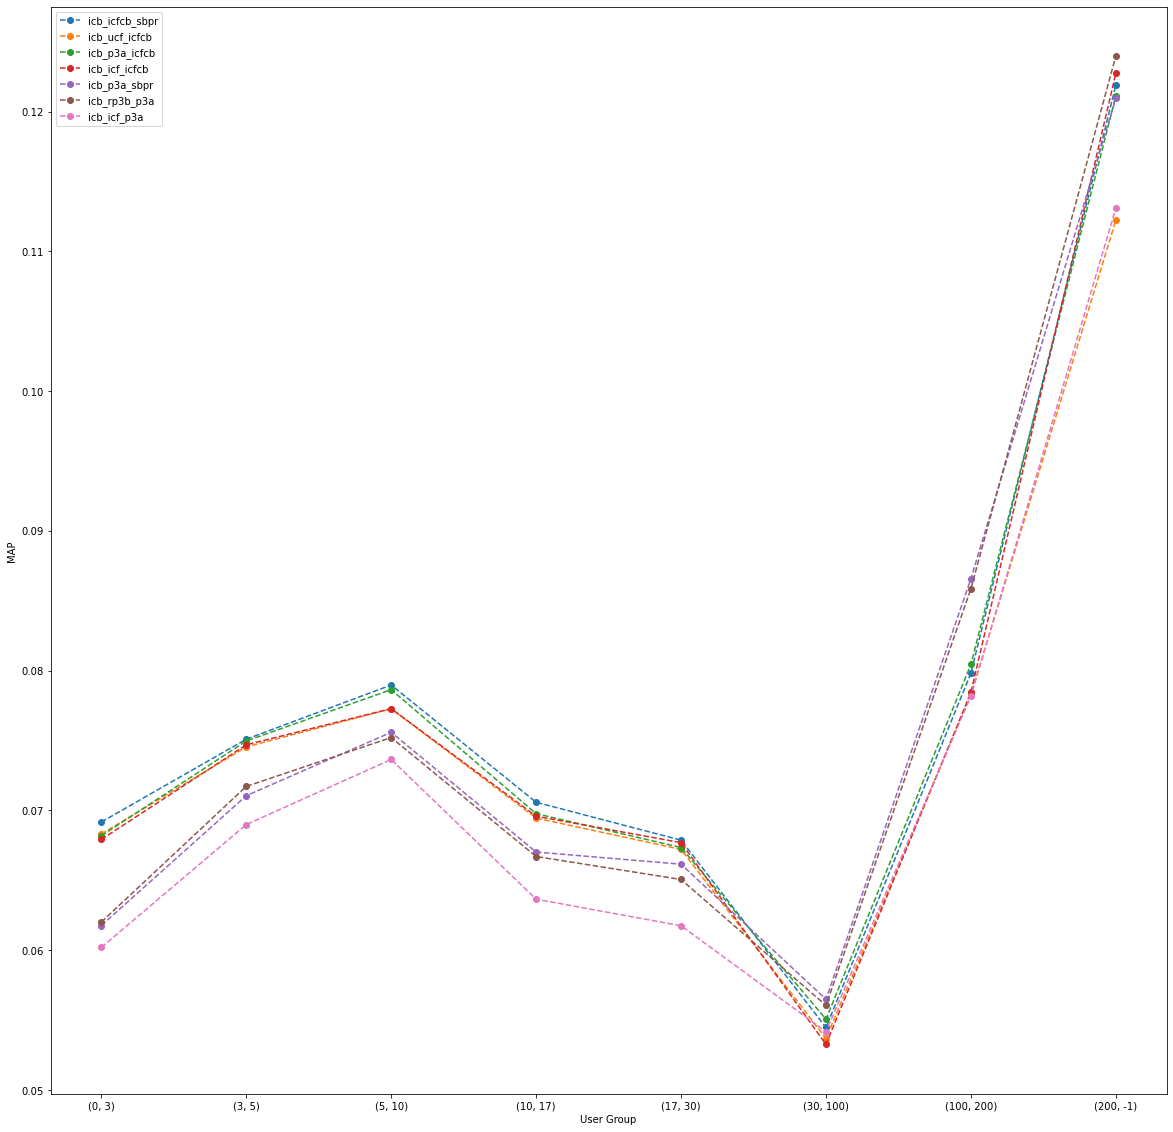

In [38]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        style = '--o'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()

---
### 5 balanced

In [39]:
f_ranges = [
    (0,4),
    (4,7),
    (7,13),
    (13,26),
    (26,-1)
]

MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    
    
    combo_dict={}
    for k in range (num_combo):
        r = []
        for i in range (len(URM_list)):
            URM_test_group = parser.filter_URM_test_by_range(URM_list[i], URM_test_list[i], f_range)
            evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
            rec = HybridCombinationSearchCVtest(URM_list[i], ICM_all, list_rec[k][0], seed = seed, fold = i)
            rec.fit(**list_rec[k][1])

            results, _ = evaluator_test.evaluateRecommender(rec)
            r.append(results[cutoff]["MAP"])
        combo_dict[k]=np.average(r)

    MAP_combo_per_group.append(combo_dict)

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.52 sec. Users per second: 651
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNC

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 2.53 sec. Users per second: 645
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRe

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1700 ( 100.00% ) in 2.59 sec. Users per second: 657
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.8

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.51 sec. Users per second: 653
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-4'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNC

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.58 sec. Users per second: 654
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
SLIM

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.56 sec. Users per second: 642
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecom

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recomm

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 2.54 sec. Users per second: 643
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.92 sec. Users per second: 577
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNC

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.39 sec. Users per second: 686
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.67 sec. Users per second: 633
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.59 sec. Users per second: 634
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fo

ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.47 sec. Users per second: 663
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_R

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1633 ( 100.00% ) in 2.51 sec. Users per second: 651
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecom

EvaluatorHoldout: Processed 1687 ( 100.00% ) in 2.59 sec. Users per second: 652
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [s

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1700 ( 100.00% ) in 2.45 sec. Users per second: 694
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
Item

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1640 ( 100.00% ) in 2.59 sec. Users per second: 634
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CB

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1245 ( 100.00% ) in 1.90 sec. Users per second: 656
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNC

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-2'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 1.93 sec. Users per second: 672
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecomm

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hyb

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1277 ( 100.00% ) in 2.02 sec. Users per second: 631
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.7

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1274 ( 100.00% ) in 2.09 sec. Users per second: 611
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-3'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=3]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNC

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 2.10 sec. Users per second: 616
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
SLIM

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1245 ( 100.00% ) in 1.96 sec. Users per second: 635
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecom

EvaluatorHoldout: Processed 1277 ( 100.00% ) in 1.90 sec. Users per second: 672
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Lo

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 2.06 sec. Users per second: 629
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFR

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 2.01 sec. Users per second: 646
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1277 ( 100.00% ) in 1.95 sec. Users per second: 654
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKN

EvaluatorHoldout: Processed 1274 ( 100.00% ) in 1.88 sec. Users per second: 679
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommend

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 1.97 sec. Users per second: 656
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1245 ( 100.00% ) in 1.90 sec. Users per second: 656
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fo

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1274 ( 100.00% ) in 1.94 sec. Users per second: 658
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Ite

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 2.00 sec. Users per second: 647
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRec

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1245 ( 100.00% ) in 1.96 sec. Users per second: 636
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1277 ( 100.00% ) in 1.94 sec. Users per second: 657
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-2'
P3

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1295 ( 100.00% ) in 1.99 sec. Users per second: 650
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN

EvaluatorHoldout: Processed 1127 ( 100.00% ) in 1.82 sec. Users per second: 619
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1112 ( 100.00% ) in 1.85 sec. Users per second: 600
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold

HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-3'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3a

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1127 ( 100.00% ) in 1.71 sec. Users per second: 661
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNC

HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-1'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1155 ( 100.00% ) in 1.87 sec. Users per second: 619
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.8

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1164 ( 100.00% ) in 1.93 sec. Users per second: 602
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-1'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1112 ( 100.00% ) in 1.77 sec. Users per second: 627
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold 

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1155 ( 100.00% ) in 2.09 sec. Users per second: 553
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-3'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_R

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-4'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 2.01 sec. Users per second: 593
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKN

EvaluatorHoldout: Processed 1112 ( 100.00% ) in 1.71 sec. Users per second: 651
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommend

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 1164 ( 100.00% ) in 1.94 sec. Users per second: 599
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNC

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1127 ( 100.00% ) in 1.96 sec. Users per second: 575
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecomme

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 1112 ( 100.00% ) in 1.86 sec. Users per second: 599
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Ite

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1155 ( 100.00% ) in 1.85 sec. Users per second: 624
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRec

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 1127 ( 100.00% ) in 1.74 sec. Users per second: 648
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 1193 ( 100.00% ) in 1.87 sec. Users per second: 638
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 1155 ( 100.00% ) in 2.03 sec. Users per second: 568
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN

EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.43 sec. Users per second: 587
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-4'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 819 ( 100.00% ) in 1.46 sec. Users per second: 561
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3a

UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=3]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.41 sec. Users per second: 593
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCB

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-0'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_te

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=1]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-1'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=1]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 850 ( 100.00% ) in 1.49 sec. Users per second: 571
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 834 ( 100.00% ) in 1.73 sec. Users per second: 482
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: URM Detected 65 (0.82 %) cold users.
P3alphaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-3'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/16

HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-4'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-4'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_re

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-0'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 819 ( 100.00% ) in 1.07 sec. Users per second: 766
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommende

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
SLIM_BPR_Recommender: URM Detected 56 (0.70 %) cold users.
SLIM_BPR_Recommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-2'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from fil

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.08 sec. Users per second: 775
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNN

HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-0'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_16

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 850 ( 100.00% ) in 0.94 sec. Users per second: 903
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender:

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 838 ( 100.00% ) in 1.02 sec. Users per second: 822
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCF

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 847 ( 100.00% ) in 1.13 sec. Users per second: 750
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommen

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 850 ( 100.00% ) in 1.05 sec. Users per second: 809
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Item

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 834 ( 100.00% ) in 1.01 sec. Users per second: 828
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaReco

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 847 ( 100.00% ) in 0.96 sec. Users per second: 878
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/16

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 819 ( 100.00% ) in 0.96 sec. Users per second: 852
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3a

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 834 ( 100.00% ) in 1.10 sec. Users per second: 760
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNC

EvaluatorHoldout: Processed 671 ( 100.00% ) in 0.97 sec. Users per second: 692
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-4'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=4]

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 675 ( 100.00% ) in 1.02 sec. Users per second: 662
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-

HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-2'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3a

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 0.88 sec. Users per second: 763
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: URM Detected 77 (0.97 %) cold users.
ItemKNNCBFRecommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-4'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=4]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
Use

ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=0]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-0'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=0]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-0'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 675 ( 100.00% ) in 1.13 sec. Users per second: 600
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86

EvaluatorHoldout: Processed 669 ( 100.00% ) in 1.09 sec. Users per second: 611
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommender/1666_fold-2'
ItemKNNCFRecommender: Loading complete
ItemKNNCFRecommender loaded. [seed=1666, fold=2]
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3be

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=3]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-3'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 1.37 sec. Users per second: 489
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
SLIM_

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 673 ( 100.00% ) in 1.38 sec. Users per second: 487
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: URM Detected 48 (0.60 %) cold users.
RP3betaRecommender: URM Detected 2381 (9.17 %) cold items.
P3alphaRecommender: URM Detected 48 (0.60 %) cold users.
P3alphaRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/16

EvaluatorHoldout: Processed 675 ( 100.00% ) in 1.09 sec. Users per second: 621
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-1'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
SLIM_BPR_Recommender: Loa

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 1.42 sec. Users per second: 474
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: URM Detected 65 (0.82 %) cold users.
UserKNNCFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRe

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 1.41 sec. Users per second: 475
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
P3alphaRecommender: URM Detected 77 (0.97 %) cold users.
P3alphaRecommender: URM Detected 2398 (9.23 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 77 (0.97 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=4]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommende

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=0]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-0'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 675 ( 100.00% ) in 1.39 sec. Users per second: 485
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: URM Detected 68 (0.86 %) cold users.
UserKNNCFRecommender: URM Detected 2439 (9.39 %) cold items.
RP3betaRecommender: URM Detected 68 (0.86 %) cold users.
RP3betaRecommender: URM Detected 2439 (9.39 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 68 (0.86 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2439 (9.39 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNN

EvaluatorHoldout: Processed 669 ( 100.00% ) in 1.16 sec. Users per second: 579
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: URM Detected 56 (0.70 %) cold users.
UserKNNCFRecommender: URM Detected 2402 (9.25 %) cold items.
RP3betaRecommender: URM Detected 56 (0.70 %) cold users.
RP3betaRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-2'
UserKNNCFRecommender: Loading complete
UserKNNCFRecommender loaded. [seed=1666, fold=2]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaRecommender/1666_fold-2'
RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=2]
P3alphaRecommende

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=3]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-3'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=3]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 1.33 sec. Users per second: 504
HybridCombinationSearchCVtest: URM Detected 77 (0.97 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: URM Detected 77 (0.97 %) cold users.
UserKNNCFRecommender: URM Detected 2398 (9.23 %) cold items.
RP3betaRecommender: URM Detected 77 (0.97 %) cold users.
RP3betaRecommender: URM Detected 2398 (9.23 %) cold items.
SLIM_BPR_Recommender: URM Detected 77 (0.97 %) cold users.
SLIM_BPR_Recommender: URM Detected 2398 (9.23 %) cold items.
UserKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/UserKNNCFRecommender/1666_fold-4'
UserKNNCF

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 673 ( 100.00% ) in 1.50 sec. Users per second: 448
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
SLIM_BPR_Recommender: URM Detected 48 (0.60 %) cold users.
SLIM_BPR_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-0'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=0]
ItemKNNCFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCFRecommen

P3alphaRecommender: Loading complete
P3alphaRecommender loaded. [seed=1666, fold=1]
ItemKNN_CBF_CF_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNN_CBF_CF_Recommender/1666_fold-1'
ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=1]
EvaluatorHoldout: Processed 669 ( 100.00% ) in 1.35 sec. Users per second: 494
HybridCombinationSearchCVtest: URM Detected 56 (0.70 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: URM Detected 56 (0.70 %) cold users.
ItemKNNCBFRecommender: URM Detected 2402 (9.25 %) cold items.
P3alphaRecommender: URM Detected 56 (0.70 %) cold users.
P3alphaRecommender: URM Detected 2402 (9.25 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 56 (0.70 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2402 (9.25 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/Item

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 1.45 sec. Users per second: 463
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
RP3betaRecommender: URM Detected 65 (0.82 %) cold users.
RP3betaRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-3'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=3]
RP3betaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/RP3betaReco

RP3betaRecommender: Loading complete
RP3betaRecommender loaded. [seed=1666, fold=4]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-4'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=4]
EvaluatorHoldout: Processed 673 ( 100.00% ) in 1.31 sec. Users per second: 516
HybridCombinationSearchCVtest: URM Detected 48 (0.60 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: URM Detected 48 (0.60 %) cold users.
ItemKNNCBFRecommender: URM Detected 2381 (9.17 %) cold items.
UserKNNCFRecommender: URM Detected 48 (0.60 %) cold users.
UserKNNCFRecommender: URM Detected 2381 (9.17 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 48 (0.60 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2381 (9.17 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/16

SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=0]
EvaluatorHoldout: Processed 675 ( 100.00% ) in 1.32 sec. Users per second: 511
HybridCombinationSearchCVtest: URM Detected 68 (0.86 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: URM Detected 68 (0.86 %) cold users.
ItemKNNCBFRecommender: URM Detected 2439 (9.39 %) cold items.
P3alphaRecommender: URM Detected 68 (0.86 %) cold users.
P3alphaRecommender: URM Detected 2439 (9.39 %) cold items.
SLIM_BPR_Recommender: URM Detected 68 (0.86 %) cold users.
SLIM_BPR_Recommender: URM Detected 2439 (9.39 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNCBFRecommender/1666_fold-1'
ItemKNNCBFRecommender: Loading complete
ItemKNNCBFRecommender loaded. [seed=1666, fold=1]
P3alphaRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/P3alphaRecommender/1666_fold-1'
P3a

ItemKNN_CBF_CF_Recommender: Loading complete
ItemKNN_CBF_CF_Recommender loaded. [seed=1666, fold=2]
SLIM_BPR_Recommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/SLIM_BPR_Recommender/1666_fold-2'
SLIM_BPR_Recommender: Loading complete
SLIM_BPR_Recommender loaded. [seed=1666, fold=2]
EvaluatorHoldout: Processed 671 ( 100.00% ) in 1.61 sec. Users per second: 416
HybridCombinationSearchCVtest: URM Detected 65 (0.82 %) cold users.
HybridCombinationSearchCVtest: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: URM Detected 65 (0.82 %) cold users.
ItemKNNCBFRecommender: URM Detected 2338 (9.00 %) cold items.
ItemKNN_CBF_CF_Recommender: URM Detected 65 (0.82 %) cold users.
ItemKNN_CBF_CF_Recommender: URM Detected 2338 (9.00 %) cold items.
SLIM_BPR_Recommender: URM Detected 65 (0.82 %) cold users.
SLIM_BPR_Recommender: URM Detected 2338 (9.00 %) cold items.
ItemKNNCBFRecommender: Loading model from file 'stored_recommenders/seed_1666_hybrid_test/ItemKNNC

In [40]:
def check_if_present(key_list, el):
    for key_val, combo_val in key_list:
        if key_val == el[0] and combo_val == el[1]:
            return True
    return False

In [41]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key, value in combo_dict.items():
        #value = combo_dict.get(key)
        print(f"> MAP combo-{combo_labels['combo'+str(key+1)]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels['combo'+str(key+1)]
            max_isCombo=True
            old_key=max_key
            max_key=key
           
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 4)
> MAP combo-icb_icf_p3a:	 0.06308084930314693
> MAP combo-icb_icf_rp3b:	 0.06227736403376055
> MAP combo-icb_icf_ucf:	 0.06413236379768543
> MAP combo-icb_rp3b_p3a:	 0.06500379388781138
> MAP combo-icb_ucf_p3a:	 0.06629271635928322
> MAP combo-icb_ucf_rp3b:	 0.06691234520692423
> MAP combo-icf_ucf_p3a:	 0.05500873160707472
> MAP combo-icf_ucf_rp3b:	 0.054834897175020825
> MAP combo-p3a_icfcb_sbpr:	 0.06946197118292577
> MAP combo-rp3b_icfcb_sbpr:	 0.06939856004799437
> MAP combo-rp3b_p3a_icfcb:	 0.06948325284635418
> MAP combo-rp3b_p3a_sbpr:	 0.05578083576784375
> MAP combo-ucf_icfcb_sbpr:	 0.06954615128436507
> MAP combo-ucf_p3a_icfcb:	 0.06946836534857453
> MAP combo-ucf_p3a_sbpr:	 0.05422004046240956
> MAP combo-ucf_rp3b_icfcb:	 0.06946041735522017
> MAP combo-ucf_rp3b_p3a:	 0.05524864666220897
> MAP combo-ucf_rp3b_sbpr:	 0.055714684517708876
> MAP combo-icb_icf_icfcb:	 0.07021242235748384
> MAP combo-icb_icf_sbpr:	 0.06314385570140744
> MAP combo-icb_p3a_icfcb:	 0.0708

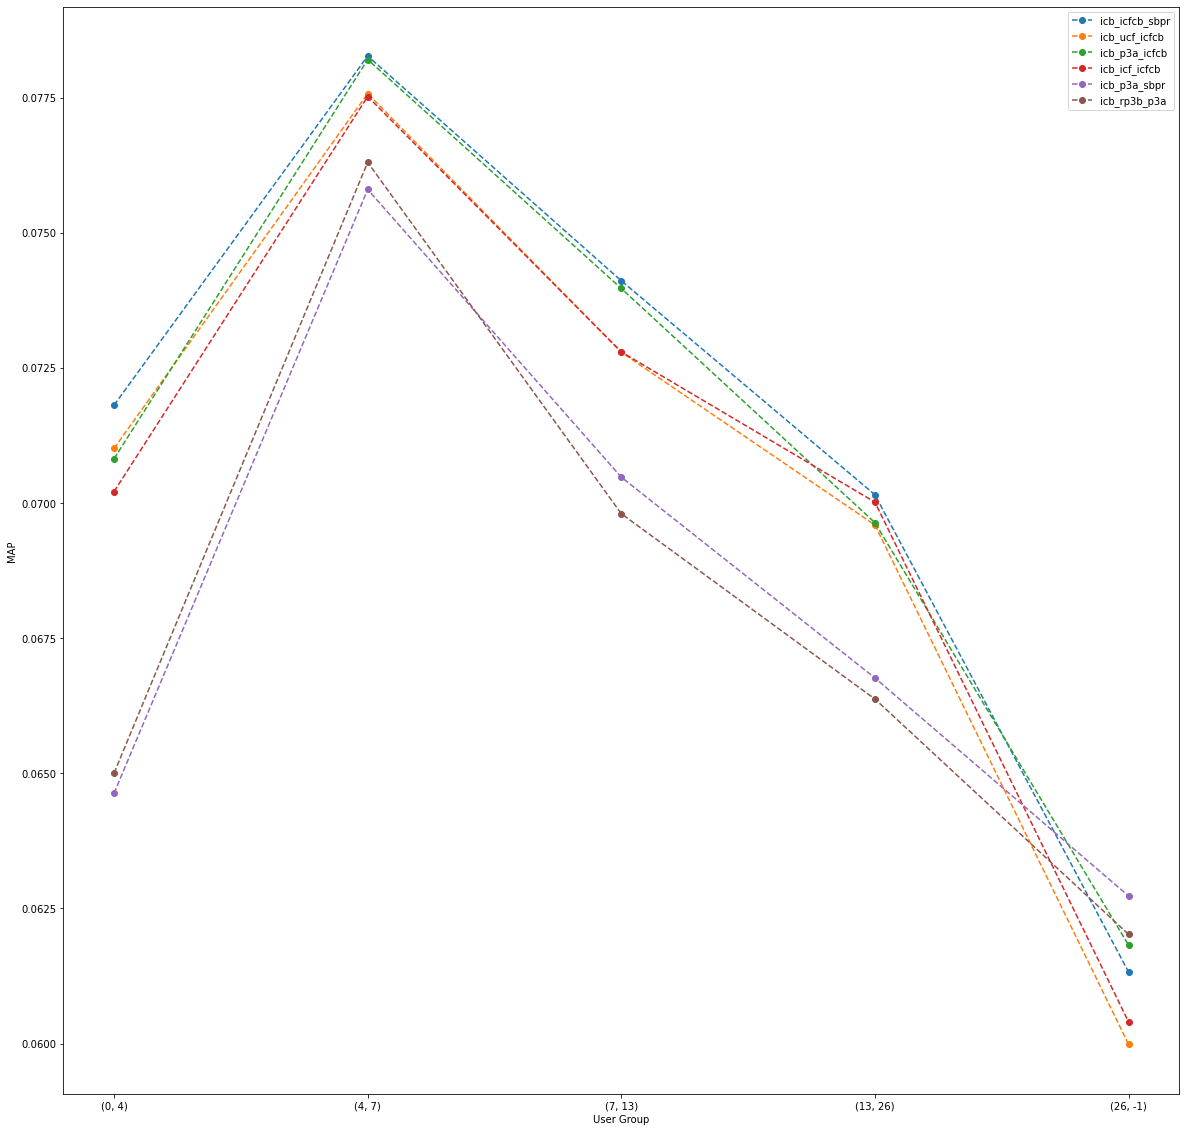

In [42]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        style = '--o'
        label = combo_labels['combo'+str(key+1)]
    """
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
        """
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()